### Problem Statement
Build a CycleGAN to translate images of horses to zebras and vice versa.

### Install libraries

In [0]:
!python3 -m pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-z0h3g6q5-build
  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae

## Explore Dataset
Download, unzip, and plot the shape and content of the dataset

In [0]:
!wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip

--2020-02-12 11:21:30--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘horse2zebra.zip’

horse2zebra.zip     100%[===================>] 111.45M   212KB/s    in 3m 48s  

2020-02-12 11:25:19 (500 KB/s) - ‘horse2zebra.zip’ saved [116867962/116867962]



In [0]:
!unzip horse2zebra.zip

Archive:  horse2zebra.zip
   creating: horse2zebra/
   creating: horse2zebra/trainA/
  inflating: horse2zebra/trainA/n02381460_6223.jpg  
  inflating: horse2zebra/trainA/n02381460_1567.jpg  
  inflating: horse2zebra/trainA/n02381460_3354.jpg  
  inflating: horse2zebra/trainA/n02381460_299.jpg  
  inflating: horse2zebra/trainA/n02381460_3001.jpg  
  inflating: horse2zebra/trainA/n02381460_4242.jpg  
  inflating: horse2zebra/trainA/n02381460_1666.jpg  
  inflating: horse2zebra/trainA/n02381460_4396.jpg  
  inflating: horse2zebra/trainA/n02381460_4502.jpg  
  inflating: horse2zebra/trainA/n02381460_8527.jpg  
  inflating: horse2zebra/trainA/n02381460_14.jpg  
  inflating: horse2zebra/trainA/n02381460_706.jpg  
  inflating: horse2zebra/trainA/n02381460_4019.jpg  
  inflating: horse2zebra/trainA/n02381460_1478.jpg  
  inflating: horse2zebra/trainA/n02381460_3449.jpg  
  inflating: horse2zebra/trainA/n02381460_5558.jpg  
  inflating: horse2zebra/trainA/n02381460_969.jpg  
  inflating: horse2

  inflating: horse2zebra/trainA/n02381460_5525.jpg  
  inflating: horse2zebra/trainA/n02381460_2014.jpg  
  inflating: horse2zebra/trainA/n02381460_3299.jpg  
  inflating: horse2zebra/trainA/n02381460_1006.jpg  
  inflating: horse2zebra/trainA/n02381460_2061.jpg  
  inflating: horse2zebra/trainA/n02381460_7695.jpg  
  inflating: horse2zebra/trainA/n02381460_1009.jpg  
  inflating: horse2zebra/trainA/n02381460_2793.jpg  
  inflating: horse2zebra/trainA/n02381460_1347.jpg  
  inflating: horse2zebra/trainA/n02381460_2027.jpg  
  inflating: horse2zebra/trainA/n02381460_591.jpg  
  inflating: horse2zebra/trainA/n02381460_6964.jpg  
  inflating: horse2zebra/trainA/n02381460_8769.jpg  
  inflating: horse2zebra/trainA/n02381460_2449.jpg  
  inflating: horse2zebra/trainA/n02381460_4467.jpg  
  inflating: horse2zebra/trainA/n02381460_1227.jpg  
  inflating: horse2zebra/trainA/n02381460_3424.jpg  
  inflating: horse2zebra/trainA/n02381460_249.jpg  
  inflating: horse2zebra/trainA/n02381460_274.jp

  inflating: horse2zebra/trainA/n02381460_7537.jpg  
  inflating: horse2zebra/trainA/n02381460_4856.jpg  
  inflating: horse2zebra/trainA/n02381460_5029.jpg  
  inflating: horse2zebra/trainA/n02381460_4081.jpg  
  inflating: horse2zebra/trainA/n02381460_3075.jpg  
  inflating: horse2zebra/trainA/n02381460_411.jpg  
  inflating: horse2zebra/trainA/n02381460_4008.jpg  
  inflating: horse2zebra/trainA/n02381460_1579.jpg  
  inflating: horse2zebra/trainA/n02381460_4815.jpg  
  inflating: horse2zebra/trainA/n02381460_203.jpg  
  inflating: horse2zebra/trainA/n02381460_3509.jpg  
  inflating: horse2zebra/trainA/n02381460_631.jpg  
  inflating: horse2zebra/trainA/n02381460_196.jpg  
  inflating: horse2zebra/trainA/n02381460_7597.jpg  
  inflating: horse2zebra/trainA/n02381460_1713.jpg  
  inflating: horse2zebra/trainA/n02381460_2109.jpg  
  inflating: horse2zebra/trainA/n02381460_2317.jpg  
  inflating: horse2zebra/trainA/n02381460_2753.jpg  
  inflating: horse2zebra/trainA/n02381460_4515.jpg

  inflating: horse2zebra/trainA/n02381460_757.jpg  
  inflating: horse2zebra/trainA/n02381460_7348.jpg  
  inflating: horse2zebra/trainA/n02381460_935.jpg  
  inflating: horse2zebra/trainA/n02381460_1711.jpg  
  inflating: horse2zebra/trainA/n02381460_881.jpg  
  inflating: horse2zebra/trainA/n02381460_4371.jpg  
  inflating: horse2zebra/trainA/n02381460_4593.jpg  
  inflating: horse2zebra/trainA/n02381460_4153.jpg  
  inflating: horse2zebra/trainA/n02381460_4536.jpg  
  inflating: horse2zebra/trainA/n02381460_4785.jpg  
  inflating: horse2zebra/trainA/n02381460_4401.jpg  
  inflating: horse2zebra/trainA/n02381460_3065.jpg  
  inflating: horse2zebra/trainA/n02381460_4528.jpg  
  inflating: horse2zebra/trainA/n02381460_933.jpg  
  inflating: horse2zebra/trainA/n02381460_3346.jpg  
  inflating: horse2zebra/trainA/n02381460_5355.jpg  
  inflating: horse2zebra/trainA/n02381460_4965.jpg  
  inflating: horse2zebra/trainA/n02381460_6975.jpg  
  inflating: horse2zebra/trainA/n02381460_8013.jpg

  inflating: horse2zebra/trainA/n02381460_6297.jpg  
  inflating: horse2zebra/trainA/n02381460_764.jpg  
  inflating: horse2zebra/trainA/n02381460_1722.jpg  
  inflating: horse2zebra/trainA/n02381460_6335.jpg  
  inflating: horse2zebra/trainA/n02381460_3229.jpg  
  inflating: horse2zebra/trainA/n02381460_1834.jpg  
  inflating: horse2zebra/trainA/n02381460_2703.jpg  
  inflating: horse2zebra/trainA/n02381460_3861.jpg  
  inflating: horse2zebra/trainA/n02381460_314.jpg  
  inflating: horse2zebra/trainA/n02381460_3108.jpg  
  inflating: horse2zebra/trainA/n02381460_3563.jpg  
  inflating: horse2zebra/trainA/n02381460_2411.jpg  
  inflating: horse2zebra/trainA/n02381460_2366.jpg  
  inflating: horse2zebra/trainA/n02381460_5537.jpg  
  inflating: horse2zebra/trainA/n02381460_1763.jpg  
  inflating: horse2zebra/trainA/n02381460_1959.jpg  
  inflating: horse2zebra/trainA/n02381460_1389.jpg  
  inflating: horse2zebra/trainA/n02381460_1134.jpg  
  inflating: horse2zebra/trainA/n02381460_8104.j

  inflating: horse2zebra/trainA/n02381460_4123.jpg  
  inflating: horse2zebra/trainA/n02381460_1557.jpg  
  inflating: horse2zebra/trainA/n02381460_2878.jpg  
  inflating: horse2zebra/trainA/n02381460_5075.jpg  
  inflating: horse2zebra/trainA/n02381460_4103.jpg  
  inflating: horse2zebra/trainA/n02381460_5601.jpg  
  inflating: horse2zebra/trainA/n02381460_4632.jpg  
  inflating: horse2zebra/trainA/n02381460_1098.jpg  
  inflating: horse2zebra/trainA/n02381460_7888.jpg  
  inflating: horse2zebra/trainA/n02381460_6252.jpg  
  inflating: horse2zebra/trainA/n02381460_58.jpg  
  inflating: horse2zebra/trainA/n02381460_8153.jpg  
  inflating: horse2zebra/trainA/n02381460_24.jpg  
  inflating: horse2zebra/trainA/n02381460_4598.jpg  
  inflating: horse2zebra/trainA/n02381460_4597.jpg  
  inflating: horse2zebra/trainA/n02381460_7398.jpg  
  inflating: horse2zebra/trainA/n02381460_3935.jpg  
  inflating: horse2zebra/trainA/n02381460_1708.jpg  
  inflating: horse2zebra/trainA/n02381460_3466.jpg

  inflating: horse2zebra/trainA/n02381460_1263.jpg  
  inflating: horse2zebra/trainA/n02381460_3226.jpg  
  inflating: horse2zebra/trainA/n02381460_1194.jpg  
  inflating: horse2zebra/trainA/n02381460_91.jpg  
  inflating: horse2zebra/trainA/n02381460_5286.jpg  
  inflating: horse2zebra/trainA/n02381460_4769.jpg  
  inflating: horse2zebra/trainA/n02381460_4312.jpg  
  inflating: horse2zebra/trainA/n02381460_2222.jpg  
  inflating: horse2zebra/trainA/n02381460_2049.jpg  
  inflating: horse2zebra/trainA/n02381460_8052.jpg  
  inflating: horse2zebra/trainA/n02381460_4663.jpg  
  inflating: horse2zebra/trainA/n02381460_1349.jpg  
  inflating: horse2zebra/trainA/n02381460_4529.jpg  
  inflating: horse2zebra/trainA/n02381460_8585.jpg  
  inflating: horse2zebra/trainA/n02381460_2726.jpg  
  inflating: horse2zebra/trainA/n02381460_9167.jpg  
  inflating: horse2zebra/trainA/n02381460_2732.jpg  
  inflating: horse2zebra/trainA/n02381460_2802.jpg  
  inflating: horse2zebra/trainA/n02381460_6688.j

  inflating: horse2zebra/trainB/n02391049_2049.jpg  
  inflating: horse2zebra/trainB/n02391049_1087.jpg  
  inflating: horse2zebra/trainB/n02391049_2476.jpg  
  inflating: horse2zebra/trainB/n02391049_2285.jpg  
  inflating: horse2zebra/trainB/n02391049_9149.jpg  
  inflating: horse2zebra/trainB/n02391049_2232.jpg  
  inflating: horse2zebra/trainB/n02391049_7722.jpg  
  inflating: horse2zebra/trainB/n02391049_737.jpg  
  inflating: horse2zebra/trainB/n02391049_5509.jpg  
  inflating: horse2zebra/trainB/n02391049_589.jpg  
  inflating: horse2zebra/trainB/n02391049_2211.jpg  
  inflating: horse2zebra/trainB/n02391049_8061.jpg  
  inflating: horse2zebra/trainB/n02391049_5875.jpg  
  inflating: horse2zebra/trainB/n02391049_1042.jpg  
  inflating: horse2zebra/trainB/n02391049_2446.jpg  
  inflating: horse2zebra/trainB/n02391049_2157.jpg  
  inflating: horse2zebra/trainB/n02391049_141.jpg  
  inflating: horse2zebra/trainB/n02391049_6184.jpg  
  inflating: horse2zebra/trainB/n02391049_344.jpg

  inflating: horse2zebra/trainB/n02391049_795.jpg  
  inflating: horse2zebra/trainB/n02391049_2239.jpg  
  inflating: horse2zebra/trainB/n02391049_178.jpg  
  inflating: horse2zebra/trainB/n02391049_1751.jpg  
  inflating: horse2zebra/trainB/n02391049_5695.jpg  
  inflating: horse2zebra/trainB/n02391049_8387.jpg  
  inflating: horse2zebra/trainB/n02391049_9051.jpg  
  inflating: horse2zebra/trainB/n02391049_9593.jpg  
  inflating: horse2zebra/trainB/n02391049_11181.jpg  
  inflating: horse2zebra/trainB/n02391049_173.jpg  
  inflating: horse2zebra/trainB/n02391049_7494.jpg  
  inflating: horse2zebra/trainB/n02391049_5503.jpg  
  inflating: horse2zebra/trainB/n02391049_248.jpg  
  inflating: horse2zebra/trainB/n02391049_9719.jpg  
  inflating: horse2zebra/trainB/n02391049_1531.jpg  
  inflating: horse2zebra/trainB/n02391049_3022.jpg  
  inflating: horse2zebra/trainB/n02391049_8699.jpg  
  inflating: horse2zebra/trainB/n02391049_3779.jpg  
  inflating: horse2zebra/trainB/n02391049_2806.jp

  inflating: horse2zebra/trainB/n02391049_789.jpg  
  inflating: horse2zebra/trainB/n02391049_125.jpg  
  inflating: horse2zebra/trainB/n02391049_3785.jpg  
  inflating: horse2zebra/trainB/n02391049_2321.jpg  
  inflating: horse2zebra/trainB/n02391049_964.jpg  
  inflating: horse2zebra/trainB/n02391049_1836.jpg  
  inflating: horse2zebra/trainB/n02391049_5791.jpg  
  inflating: horse2zebra/trainB/n02391049_2982.jpg  
  inflating: horse2zebra/trainB/n02391049_6762.jpg  
  inflating: horse2zebra/trainB/n02391049_3233.jpg  
  inflating: horse2zebra/trainB/n02391049_474.jpg  
  inflating: horse2zebra/trainB/n02391049_1024.jpg  
  inflating: horse2zebra/trainB/n02391049_10461.jpg  
  inflating: horse2zebra/trainB/n02391049_557.jpg  
  inflating: horse2zebra/trainB/n02391049_4027.jpg  
  inflating: horse2zebra/trainB/n02391049_3038.jpg  
  inflating: horse2zebra/trainB/n02391049_3755.jpg  
  inflating: horse2zebra/trainB/n02391049_7151.jpg  
  inflating: horse2zebra/trainB/n02391049_2811.jpg

  inflating: horse2zebra/trainB/n02391049_8539.jpg  
  inflating: horse2zebra/trainB/n02391049_2485.jpg  
  inflating: horse2zebra/trainB/n02391049_5291.jpg  
  inflating: horse2zebra/trainB/n02391049_9494.jpg  
  inflating: horse2zebra/trainB/n02391049_3289.jpg  
  inflating: horse2zebra/trainB/n02391049_2155.jpg  
  inflating: horse2zebra/trainB/n02391049_10596.jpg  
  inflating: horse2zebra/trainB/n02391049_3148.jpg  
  inflating: horse2zebra/trainB/n02391049_1046.jpg  
  inflating: horse2zebra/trainB/n02391049_43.jpg  
  inflating: horse2zebra/trainB/n02391049_32.jpg  
  inflating: horse2zebra/trainB/n02391049_1095.jpg  
  inflating: horse2zebra/trainB/n02391049_3958.jpg  
  inflating: horse2zebra/trainB/n02391049_5371.jpg  
  inflating: horse2zebra/trainB/n02391049_6655.jpg  
  inflating: horse2zebra/trainB/n02391049_7096.jpg  
  inflating: horse2zebra/trainB/n02391049_3202.jpg  
  inflating: horse2zebra/trainB/n02391049_487.jpg  
  inflating: horse2zebra/trainB/n02391049_8291.jpg

  inflating: horse2zebra/trainB/n02391049_633.jpg  
  inflating: horse2zebra/trainB/n02391049_1555.jpg  
  inflating: horse2zebra/trainB/n02391049_752.jpg  
  inflating: horse2zebra/trainB/n02391049_929.jpg  
  inflating: horse2zebra/trainB/n02391049_976.jpg  
  inflating: horse2zebra/trainB/n02391049_8008.jpg  
  inflating: horse2zebra/trainB/n02391049_2229.jpg  
  inflating: horse2zebra/trainB/n02391049_425.jpg  
  inflating: horse2zebra/trainB/n02391049_74.jpg  
  inflating: horse2zebra/trainB/n02391049_1725.jpg  
  inflating: horse2zebra/trainB/n02391049_9135.jpg  
  inflating: horse2zebra/trainB/n02391049_6245.jpg  
  inflating: horse2zebra/trainB/n02391049_496.jpg  
  inflating: horse2zebra/trainB/n02391049_718.jpg  
  inflating: horse2zebra/trainB/n02391049_10427.jpg  
  inflating: horse2zebra/trainB/n02391049_10339.jpg  
  inflating: horse2zebra/trainB/n02391049_5908.jpg  
  inflating: horse2zebra/trainB/n02391049_1937.jpg  
  inflating: horse2zebra/trainB/n02391049_10209.jpg  

  inflating: horse2zebra/trainB/n02391049_776.jpg  
  inflating: horse2zebra/trainB/n02391049_4292.jpg  
  inflating: horse2zebra/trainB/n02391049_7645.jpg  
  inflating: horse2zebra/trainB/n02391049_3578.jpg  
  inflating: horse2zebra/trainB/n02391049_2408.jpg  
  inflating: horse2zebra/trainB/n02391049_2258.jpg  
  inflating: horse2zebra/trainB/n02391049_1464.jpg  
  inflating: horse2zebra/trainB/n02391049_7919.jpg  
  inflating: horse2zebra/trainB/n02391049_3081.jpg  
  inflating: horse2zebra/trainB/n02391049_3221.jpg  
  inflating: horse2zebra/trainB/n02391049_627.jpg  
  inflating: horse2zebra/trainB/n02391049_9747.jpg  
  inflating: horse2zebra/trainB/n02391049_1535.jpg  
  inflating: horse2zebra/trainB/n02391049_978.jpg  
  inflating: horse2zebra/trainB/n02391049_2824.jpg  
  inflating: horse2zebra/trainB/n02391049_6216.jpg  
  inflating: horse2zebra/trainB/n02391049_4693.jpg  
  inflating: horse2zebra/trainB/n02391049_6159.jpg  
  inflating: horse2zebra/trainB/n02391049_787.jpg

  inflating: horse2zebra/trainB/n02391049_1063.jpg  
  inflating: horse2zebra/trainB/n02391049_6935.jpg  
  inflating: horse2zebra/trainB/n02391049_2091.jpg  
  inflating: horse2zebra/trainB/n02391049_2875.jpg  
  inflating: horse2zebra/trainB/n02391049_9055.jpg  
  inflating: horse2zebra/trainB/n02391049_7979.jpg  
  inflating: horse2zebra/trainB/n02391049_5618.jpg  
  inflating: horse2zebra/trainB/n02391049_2766.jpg  
  inflating: horse2zebra/trainB/n02391049_8394.jpg  
  inflating: horse2zebra/trainB/n02391049_4839.jpg  
  inflating: horse2zebra/trainB/n02391049_6735.jpg  
  inflating: horse2zebra/trainB/n02391049_2477.jpg  
  inflating: horse2zebra/trainB/n02391049_85.jpg  
  inflating: horse2zebra/trainB/n02391049_2616.jpg  
  inflating: horse2zebra/trainB/n02391049_1145.jpg  
  inflating: horse2zebra/trainB/n02391049_857.jpg  
  inflating: horse2zebra/trainB/n02391049_3294.jpg  
  inflating: horse2zebra/trainB/n02391049_916.jpg  
  inflating: horse2zebra/trainB/n02391049_3324.jpg

  inflating: horse2zebra/trainB/n02391049_2375.jpg  
  inflating: horse2zebra/trainB/n02391049_8059.jpg  
  inflating: horse2zebra/trainB/n02391049_9762.jpg  
  inflating: horse2zebra/trainB/n02391049_10504.jpg  
  inflating: horse2zebra/trainB/n02391049_926.jpg  
  inflating: horse2zebra/trainB/n02391049_992.jpg  
  inflating: horse2zebra/trainB/n02391049_3043.jpg  
  inflating: horse2zebra/trainB/n02391049_6609.jpg  
  inflating: horse2zebra/trainB/n02391049_682.jpg  
  inflating: horse2zebra/trainB/n02391049_224.jpg  
  inflating: horse2zebra/trainB/n02391049_2197.jpg  
  inflating: horse2zebra/trainB/n02391049_2974.jpg  
  inflating: horse2zebra/trainB/n02391049_4413.jpg  
  inflating: horse2zebra/trainB/n02391049_362.jpg  
  inflating: horse2zebra/trainB/n02391049_335.jpg  
  inflating: horse2zebra/trainB/n02391049_3623.jpg  
  inflating: horse2zebra/trainB/n02391049_2897.jpg  
  inflating: horse2zebra/trainB/n02391049_3191.jpg  
  inflating: horse2zebra/trainB/n02391049_2266.jpg 

  inflating: horse2zebra/testA/n02381460_2540.jpg  
  inflating: horse2zebra/testA/n02381460_6640.jpg  
  inflating: horse2zebra/testA/n02381460_2890.jpg  
  inflating: horse2zebra/testA/n02381460_4630.jpg  
  inflating: horse2zebra/testA/n02381460_7140.jpg  
  inflating: horse2zebra/testA/n02381460_7250.jpg  
  inflating: horse2zebra/testA/n02381460_2120.jpg  
  inflating: horse2zebra/testA/n02381460_4160.jpg  
  inflating: horse2zebra/testA/n02381460_900.jpg  
  inflating: horse2zebra/testA/n02381460_1350.jpg  
  inflating: horse2zebra/testA/n02381460_2870.jpg  
  inflating: horse2zebra/testA/n02381460_360.jpg  
  inflating: horse2zebra/testA/n02381460_8900.jpg  
  inflating: horse2zebra/testA/n02381460_500.jpg  
  inflating: horse2zebra/testA/n02381460_440.jpg  
  inflating: horse2zebra/testA/n02381460_1540.jpg  
  inflating: horse2zebra/testA/n02381460_7300.jpg  
  inflating: horse2zebra/testA/n02381460_3240.jpg  
  inflating: horse2zebra/testA/n02381460_4640.jpg  
  inflating: hor

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed

In [0]:
# load all images in a directory into memory
def load_images(path, size=(256,256)):
    data_list = list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
        # load and resize the image
        pixels = load_img(path + filename, target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # store
        data_list.append(pixels)
    return asarray(data_list)

In [0]:
# dataset path
path = 'horse2zebra/'

In [0]:
# load dataset A
dataA1 = load_images(path + 'trainA/')
dataAB = load_images(path + 'testA/')
dataA = vstack((dataA1, dataAB))
print('Loaded dataA: ', dataA.shape)

Loaded dataA:  (1187, 256, 256, 3)


In [0]:
# load dataset B
dataB1 = load_images(path + 'trainB/')
dataB2 = load_images(path + 'testB/')
dataB = vstack((dataB1, dataB2))
print('Loaded dataB: ', dataB.shape)

Loaded dataB:  (1474, 256, 256, 3)


In [0]:
# save as compressed numpy array
filename = 'horse2zebra_256.npz'
savez_compressed(filename, dataA, dataB)
print('Saved dataset: ', filename)

Saved dataset:  horse2zebra_256.npz


In [0]:
# load and plot the prepared dataset
from numpy import load
from matplotlib import pyplot

# load the dataset
data = load('horse2zebra_256.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)

Loaded:  (1187, 256, 256, 3) (1474, 256, 256, 3)


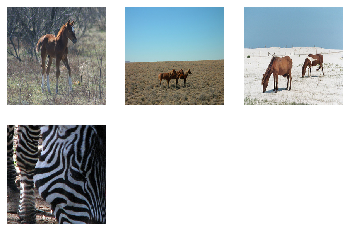

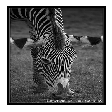

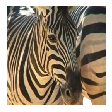

In [0]:
# plot source images
n_samples = 3
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(dataA[i].astype('uint8'))
    # plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(dataB[i].astype('uint8'))
    pyplot.show()

## Training a CycleGAN on the horse2zebra dataset

In [0]:
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

### Define the discriminator model

In [0]:
def define_discriminator(image_shape):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # source image input
    in_image = Input(shape=image_shape)
    # C64
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
    d = LeakyReLU(alpha=0.2)(d)
    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C256
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.2)(d)
    # C512
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.2)(d)
    # second last output layer
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = InstanceNormalization(axis=-1)(d)
    d = LeakyReLU(alpha=0.2)(d)
    # patch output
    patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    # define model
    model = Model(in_image, patch_out)
    # compile model
    model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
    return model

### Define a ResNet block

In [0]:
def resnet_block(n_filters, input_layer):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # first layer convolutional layer
    g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
    g = InstanceNormalization(axis=-1)(g)
    g = Activation('relu')(g)
    # second convolutional layer
    g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
    g = InstanceNormalization(axis=-1)(g)
    # concatenate merge channel-wise with input layer
    g = Concatenate()([g, input_layer])
    return g

### Define the standalone generator model

In [0]:
def define_generator(image_shape, n_resnet=9):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=image_shape)
    # c7s1-64
    g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
    g = InstanceNormalization(axis=-1)(g)
    g = Activation('relu')(g)
    # d128
    g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
    g = InstanceNormalization(axis=-1)(g)
    g = Activation('relu')(g)
    # d256
    g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
    g = InstanceNormalization(axis=-1)(g)
    g = Activation('relu')(g)
    # R256
    for _ in range(n_resnet):
        g = resnet_block(256, g)
    # u128
    g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
    g = InstanceNormalization(axis=-1)(g)
    g = Activation('relu')(g)
    # u64
    g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
    g = InstanceNormalization(axis=-1)(g)
    g = Activation('relu')(g)
    # c7s1-3
    g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
    g = InstanceNormalization(axis=-1)(g)
    out_image = Activation('tanh')(g)
    # define model
    model = Model(in_image, out_image)
    return model

### Define a composite model for updating generators by adversarial and cycle loss

In [0]:
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
    # ensure the model we're updating is trainable
    g_model_1.trainable = True
    # mark discriminator as not trainable
    d_model.trainable = False
    # mark other generator model as not trainable
    g_model_2.trainable = False
    # discriminator element
    input_gen = Input(shape=image_shape)
    gen1_out = g_model_1(input_gen)
    output_d = d_model(gen1_out)
    # identity element
    input_id = Input(shape=image_shape)
    output_id = g_model_1(input_id)
    # forward cycle
    output_f = g_model_2(gen1_out)
    # backward cycle
    gen2_out = g_model_2(input_id)
    output_b = g_model_1(gen2_out)
    # define model graph
    model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
    # define optimization algorithm configuration
    opt = Adam(lr=0.0002, beta_1=0.5)
    # compile model with weighting of least squares loss and L1 loss
    model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
    return model

### Load and prepare training images

In [0]:
def load_real_samples(filename):
    # load the dataset
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

### Select a batch of random samples, returns images, and target

In [0]:
def generate_real_samples(dataset, n_samples, patch_shape):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, patch_shape, patch_shape, 1))
    return X, y

### Generate a batch of images, returns images, and targets

In [0]:
def generate_fake_samples(g_model, dataset, patch_shape):
    # generate fake instance
    X = g_model.predict(dataset)
    # create 'fake' class labels (0)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

### Save the generator models to file

In [0]:
def save_models(step, g_model_AtoB, g_model_BtoA):
    # save the first generator model
    filename1 = 'g_model_AtoB_%06d.h5' % (step+1)
    g_model_AtoB.save(filename1)
    # save the second generator model
    filename2 = 'g_model_BtoA_%06d.h5' % (step+1)
    g_model_BtoA.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

### Generate samples and save as a plot and save the model


In [0]:
def summarize_performance(step, g_model, trainX, name, n_samples=5):
    # select a sample of input images
    X_in, _ = generate_real_samples(trainX, n_samples, 0)
    # generate translated images
    X_out, _ = generate_fake_samples(g_model, X_in, 0)
    # scale all pixels from [-1,1] to [0,1]
    X_in = (X_in + 1) / 2.0
    X_out = (X_out + 1) / 2.0
    # plot real images
    for i in range(n_samples):
        pyplot.subplot(2, n_samples, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X_in[i])
    # plot translated image
    for i in range(n_samples):
        pyplot.subplot(2, n_samples, 1 + n_samples + i)
        pyplot.axis('off')
        pyplot.imshow(X_out[i])
    # save plot to file
    filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
    pyplot.savefig(filename1)
    pyplot.close()

### Update image pool for fake images


In [0]:
def update_image_pool(pool, images, max_size=50):
    selected = list()
    for image in images:
        if len(pool) < max_size:
            # stock the pool
            pool.append(image)
            selected.append(image)
        elif random() < 0.5:
            # use image, but don't add it to the pool
            selected.append(image)
        else:
            # replace an existing image and use replaced image
            ix = randint(0, len(pool))
            selected.append(pool[ix])
            pool[ix] = image
    return asarray(selected)

### Train CycleGAN models


In [0]:
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
    # define properties of the training run
    n_epochs, n_batch, = 100, 1
    # determine the output square shape of the discriminator
    n_patch = d_model_A.output_shape[1]
    # unpack dataset
    trainA, trainB = dataset
    # prepare image pool for fakes
    poolA, poolB = list(), list()
    # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    # manually enumerate epochs
    for i in range(n_steps):
        # select a batch of real samples
        X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
        X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
        # generate a batch of fake samples
        X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
        X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
        # update fakes from pool
        X_fakeA = update_image_pool(poolA, X_fakeA)
        X_fakeB = update_image_pool(poolB, X_fakeB)
        # update generator B->A via adversarial and cycle loss
        g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
        # update discriminator for A -> [real/fake]
        dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
        dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
        # update generator A->B via adversarial and cycle loss
        g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
        # update discriminator for B -> [real/fake]
        dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
        dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
        # summarize performance
        print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
        # evaluate the model performance every so often
        if (i+1) % (bat_per_epo * 1) == 0:
            # plot A->B translation
            summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
            # plot B->A translation
            summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
        if (i+1) % (bat_per_epo * 5) == 0:
            # save the models
            save_models(i, g_model_AtoB, g_model_BtoA)

In [0]:
# load image data
dataset = load_real_samples('horse2zebra_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (1187, 256, 256, 3) (1474, 256, 256, 3)


In [0]:
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]

In [0]:
# generator: A -> B
g_model_AtoB = define_generator(image_shape)

In [0]:
# generator: B -> A
g_model_BtoA = define_generator(image_shape)

In [0]:
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)

In [0]:
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)

In [0]:
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)

In [0]:
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

In [0]:
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

Loaded (1187, 256, 256, 3) (1474, 256, 256, 3)














/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected

>1, dA[2.021,1.961] dB[0.943,1.164] g[16.987,19.133]
>2, dA[3.044,0.750] dB[3.698,0.849] g[16.163,17.303]
>3, dA[2.913,0.950] dB[3.648,0.910] g[20.743,20.692]
>4, dA[2.122,1.288] dB[1.412,1.844] g[17.773,17.295]
>5, dA[3.484,4.010] dB[1.656,3.485] g[17.395,24.106]
>6, dA[4.223,11.554] dB[1.230,2.823] g[16.711,25.423]
>7, dA[1.859,5.500] dB[1.337,2.630] g[15.259,18.133]
>8, dA[3.273,6.968] dB[0.802,1.668] g[19.263,21.027]
>9, dA[1.327,5.817] dB[0.884,1.160] g[16.611,19.551]
>10, dA[0.736,2.967] dB[0.818,1.127] g[16.136,18.177]
>11, dA[1.161,0.885] dB[0.886,2.612] g[15.969,14.586]
>12, dA[1.083,0.814] dB[2.293,3.138] g[16.321,12.514]
>13, dA[1.246,0.612] dB[1.351,2.294] g[15.744,12.134]
>14, dA[0.818,0.542] dB[1.966,3.142] g[20.710,15.175]
>15, dA[1.015,0.513] dB[1.664,1.838] g[15.924,12.923]
>16, dA[0.690,0.575] dB[0.774,3.151] g[15.191,11.318]
>17, dA[0.535,0.525] dB[1.073,1.471] g[13.385,11.469]
>18, dA[0.635,0.442] dB[1.056,0.627] g[12.198,10.816]
>19, dA[0.544,0.395] dB[0.414,0.635]